In [43]:
library(tidyverse)
library(dplyr)
library(tidymodels)

<h1><u>(1) Data Description</u></h1>

<h2>Players Data Set Description:</h2>

196 observations and 7 variables.

In [45]:
#Codes for The Players Data Set:

players_url<- "https://raw.githubusercontent.com/charlizechan/dsci100_project/refs/heads/main/data/players.csv"
players_data <- read_csv(players_url)
head(players_data)

#Finding out How many Observations
number_observations_players <- nrow(players_data)
number_observations_players

#Table for variables meaning and type
variables_players <- tibble::tibble(
  Variable = c("experience", "subscribe", "hashedEmail", 
               "played_hours", "name", "gender", "Age"),
  
  Meaning = c("Player’s experience/skill level",
              "Indicates if the player is a subscriber to the game's (MineCraft) newsletter",
              "Anonymized unique identifier for each player",
              "Total number of hours the player has played",
              "Player’s first name",
              "Player’s gender identity",
              "Player’s age in years"),
  
  Type = c("Categorical", "Categorical", "Categorical",
           "Quantitative", "Categorical", "Categorical", "Quantitative"))

#Percentage of players' skill levels
experience_players <- players_data |> 
count(experience)|> mutate(Proportion_of_Skill_Level = round(n/196*100, 2)) |>
rename(Count = n)


#Percentage of players' are subscribed or not
subscribe_players <- players_data |> count(subscribe) |> mutate(Proportion_of_Subscription_Status = round(n/196*100, 2)) |>
rename(Count = n)

#Count and Percentage of 
gender_players <- players_data |> count(gender) |> mutate(Proportion_of_Gender = round(n/196 *100, 2)) |>
rename(Count = n)

#Summary Statistics of Variables
summary(players_data)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [22]:
variables_players

Variable,Meaning,Type
<chr>,<chr>,<chr>
experience,Player’s experience/skill level,Categorical
subscribe,Indicates if the player is a subscriber to the game's (MineCraft) newsletter,Categorical
hashedEmail,Anonymized unique identifier for each player,Categorical
played_hours,Total number of hours the player has played,Quantitative
name,Player’s first name,Categorical
gender,Player’s gender identity,Categorical
Age,Player’s age in years,Quantitative


<h3>  Exploration of Notable Variables: </h3>

  1) **experience** 

In [23]:
experience_players

experience,Count,Proportion_of_Skill_Level
<chr>,<int>,<dbl>
Amateur,63,32.14
Beginner,35,17.86
Pro,14,7.14
Regular,36,18.37
Veteran,48,24.49


2) **subscribe** (TRUE = subscribed; FALSE = Not Subscribed)

If used as a label in a K-NN classification model, an issue could arise due to "TRUE" (subscribed) being too common. The model can be biased by the quantity of "TRUE", especially for high K (neighbors) values.


In [24]:
subscribe_players

subscribe,Count,Proportion_of_Subscription_Status
<lgl>,<int>,<dbl>
FALSE,52,26.53
TRUE,144,73.47


3) For **played hours**, the mean is 5.85 hours. The range is huge, from less than an hour to 223 hours, and could indicate that there are outliers. This could be an issue for linear regression models, which is sensitive to outliers, because of their high influence on the best fit line.

4) **gender**

In [25]:
gender_players

gender,Count,Proportion_of_Gender
<chr>,<int>,<dbl>
Agender,2,1.02
Female,37,18.88
Male,124,63.27
Non-binary,15,7.65
Other,1,0.51
Prefer not to say,11,5.61
Two-Spirited,6,3.06


5) The players' **ages** range from 9 years old to 58 years old with a median of 19 years old. This wide range could indicate outliers, and could be an issue for linear regression models.


In [26]:
summary(players_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.00   17.00   19.00   21.14   22.75   58.00       2 

* Other Issues:

  Another issue is that players may enter incorrect information, such as lying about their age due to game age restrictions.

<h2>Sessions Data Set Description</h2>

1535 observations and 5 variables.

In [44]:
#Codes for the Sessions data set

sessions_url <- "https://raw.githubusercontent.com/charlizechan/dsci100_project/refs/heads/main/data/sessions.csv"
sessions_data <- read_csv(sessions_url)
head(sessions_data)

#Finding out How many Observations
number_observations_sessions <- nrow(sessions_data)
number_observations_sessions

#Number of Variables and their Names
colnames(sessions_data)

#Table for Variables meaning and Type
variables_sessions <- tibble::tibble(
  Variable = c("hashedEmail", "start_time", "end_time", 
               "original_start_time", "original_end_time"),
  
  Meaning = c("Anonymized unique identifier for each player",
              "The actual recorded start time of a session", 
              "The actual recorded end time of a session", 
              "Original start timestamp (ms)", 
              "Original end timestamp (ms)"),
  
  Type = c("Categorical", "Quantitative", "Quantitative",
           "Quantitative", "Quantitative"))

summary(sessions_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


[1] 1535

[1] "hashedEmail"         "start_time"          "end_time"           
[4] "original_start_time" "original_end_time"

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

In [27]:
variables_sessions

Variable,Meaning,Type
<chr>,<chr>,<chr>
hashedEmail,Anonymized unique identifier for each player,Categorical
start_time,The actual recorded start time of a session,Quantitative
end_time,The actual recorded end time of a session,Quantitative
original_start_time,Original start timestamp (ms),Quantitative
original_end_time,Original end timestamp (ms),Quantitative


<h3>Exploration of Notable Variables:</h3>
  
  1) **start_time and end_time**
  
     We can calculate session durations, where the mean is 50.86 minutes. Again, since session duration has a wide range from 3 minutes to 259 minutes, there could be outliers, and would be a problem for linear regression models.

In [28]:
#Computation of Mean Session Duration: 
# (code used is not from class, referenced from the "AI Overview" section when searched on Google)

#Using the clock time to calculate session duration in minutes
session_durations <- sessions_data |> mutate(
    start_time = dmy_hm(start_time),  # day-month-year hour:minute
    end_time = dmy_hm(end_time),
    session_duration_mins = as.numeric(difftime(end_time, start_time, units = "mins"))
  )
head(session_durations)

#Calculating the mean
summary(session_durations$session_duration_mins)


hashedEmail,start_time,end_time,original_start_time,original_end_time,session_duration_mins
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12,12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12,13
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12,23
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12,36
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,1.71665e+12,1.71665e+12,11
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12,122


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   3.00    9.00   30.00   50.86   73.00  259.00       2 

2) **original_start_time and original_end_time**

The values for these variables could be huge because they are in milliseconds, affecting distance calculation for K-NN classification. Therefore, this should be standardized before being used in the model.

Additionally, including both variables in a model could create high multicollinearity in linear regression models because the end time perfectly predicts the start time. This makes the model's coefficients harder to interpret and less reliable for prediction. 

In [29]:
summary(session_durations$original_start_time)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.712e+12 1.716e+12 1.719e+12 1.719e+12 1.722e+12 1.727e+12 

In [30]:
summary(session_durations$original_end_time)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
1.712e+12 1.716e+12 1.719e+12 1.719e+12 1.722e+12 1.727e+12         2 

<h2>Issues in the Data:</h2>
  
  The data is not tidy because the columns start_time and end_time have two values in a single cell. 

In [31]:
#Tidying the data
sessions_data_tidy <- sessions_data |> 
separate(col = start_time, 
         into = c("start_Date", "start_time"),
         sep = " ") |>
separate(col = end_time, 
         into = c("end_date", "end_time"),
         sep = " ")
head(sessions_data_tidy)  

hashedEmail,start_Date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,23/06/2024,17:10,1.71916e+12,1.71916e+12


<h1> <u> (2) Questions </u> </h1>

**Broad question**: What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various players?

**Specific question**: Can age and total played hours predict whether or not a player subscribes to a game-related newsletter?

From the players dataset, the variables "Age" and "played_hours" serve as predictors, and the "subscribe" column provides labels for building a K-NN classification model that predicts "TRUE" or "FALSE" subscription status. Classification uses categorical outcomes, therefore,  we must convert "subscribe" to a factor using as_factor(). We also need to balance the "TRUE" (subscribed) and "FALSE" (not subscribed) values to avoid biased classification. Since the dataset contains missing values, we must decide whether to remove them or use mean imputation depending on the amount missing. Additionally, Age and played_hours must be standardized to the same scale before modeling. The players dataset is already tidy, with each row as one observation, each column one variable, and each cell one value.

<h1> <u>(3) Exploratory Data Analysis and Visualization </u> </h1>


In [32]:
players_url<- "https://raw.githubusercontent.com/charlizechan/dsci100_project/refs/heads/main/data/players.csv"
players_data <- read_csv(players_url)
head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


<h2>Wrangling:</h2>

* Converting the label (subscribe) into a factor data type:

In [33]:
players_data <- players_data |> 
mutate(subscribe = as_factor(subscribe)) 

head(players_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


* Remove/ Impute Missing Data

  Among the variables we are using (subscribe, Age, played_hours), there are only two missing data points, which are in the Age variable, therefore, removing them will suffice.

In [34]:
summary(players_data)

  experience        subscribe   hashedEmail         played_hours    
 Length:196         FALSE: 52   Length:196         Min.   :  0.000  
 Class :character   TRUE :144   Class :character   1st Qu.:  0.000  
 Mode  :character               Mode  :character   Median :  0.100  
                                                   Mean   :  5.846  
                                                   3rd Qu.:  0.600  
                                                   Max.   :223.100  
                                                                    
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                                       NA's   :2      

In [35]:
no_missing_players <- players_data |> drop_na()
summary(no_missing_players)

  experience        subscribe   hashedEmail         played_hours    
 Length:194         FALSE: 52   Length:194         Min.   :  0.000  
 Class :character   TRUE :142   Class :character   1st Qu.:  0.000  
 Mode  :character               Mode  :character   Median :  0.100  
                                                   Mean   :  5.905  
                                                   3rd Qu.:  0.600  
                                                   Max.   :223.100  
     name              gender               Age       
 Length:194         Length:194         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  

* Balancing subscribe's values

In [36]:
library(themis)

players_recipe <- recipe(subscribe ~ Age + played_hours, data = no_missing_players) |>
  step_upsample(subscribe, over_ratio = 1, skip = FALSE) |>
  prep()

players_recipe

upsampled_players <- bake(players_recipe, no_missing_players)

upsampled_players |>
  group_by(subscribe) |>
  summarize(n = n())



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Training information 

Training data contained 194 data points and no incomplete rows.



── Operations 

• Up-sampling based on: subscribe | Trained



subscribe,n
<fct>,<int>
FALSE,142
TRUE,142


* Standardize Age and played_hours

In [37]:
players_standardize_recipe <- recipe(subscribe ~ Age + played_hours, data = upsampled_players)|>
step_scale(all_predictors())|>
step_center(all_predictors())|>
prep()

players_wrangled <- bake(players_standardize_recipe, upsampled_players)
head(players_wrangled)


Age,played_hours,subscribe
<dbl>,<dbl>,<fct>
2.3895056,-0.17450640,FALSE
-0.6146602,-0.17450640,FALSE
0.1363813,-0.09003424,FALSE
-0.0782020,-0.17450640,FALSE
0.3509645,-0.17873001,FALSE
-0.1854936,-0.17873001,FALSE


<h2>Mean of Quantitative Variables in the Players Data Set:</h2>

| Quantitative Variable    | Savings |
| -------------------------| ------- |
| Played Hours             | 5.85    |
| Age in Years             | 21.14   |


<h2>Exploratory Visualizations:</h2>

**1) Exploring Age with Subscription Status**

Most players are in their late teens to early 20s, with far more subscribers than non-subscribers across all ages. Non-subscribers are mostly clustered in the older age range, above 30.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


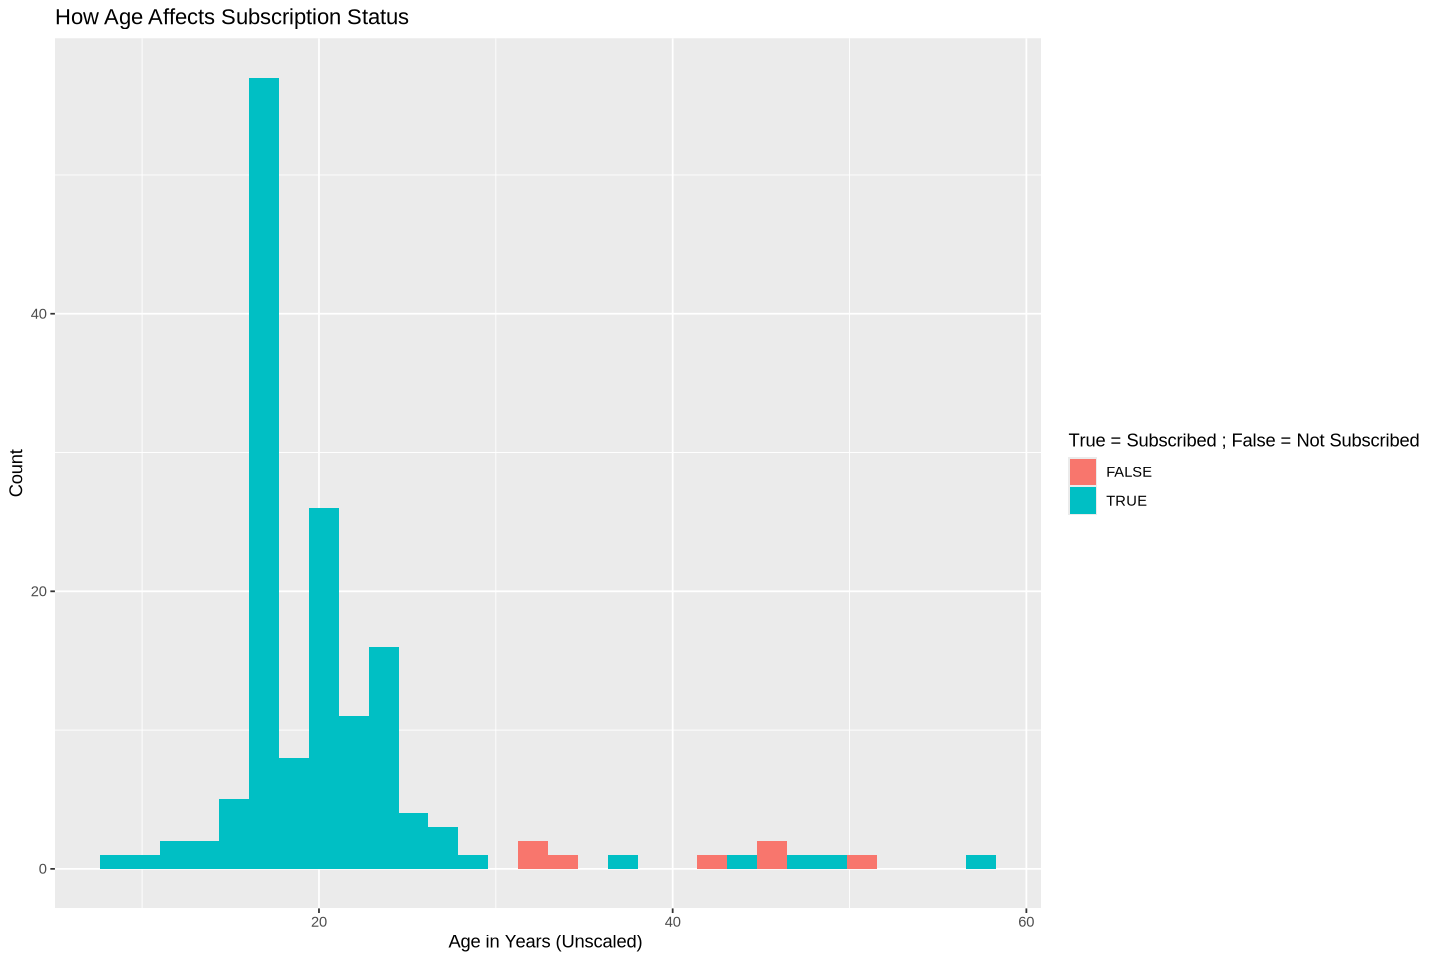

In [38]:
options(repr.plot.width = 12, repr.plot.height = 8)

age_vs_subscribe <- players_data|>
ggplot( aes(x= Age, fill = subscribe) ) +
geom_histogram(position = "identity")+
labs(x= "Age in Years (Unscaled) ", y = "Count", fill = "True = Subscribed ; False = Not Subscribed") +
ggtitle("How Age Affects Subscription Status")

age_vs_subscribe


**2) Exploring Played Hours with Subscription Status**

Most players have played hours below 25. Subscribers dominate across all played-hour ranges, while non-subscribers appear mostly among players with hours less than 25 as well.

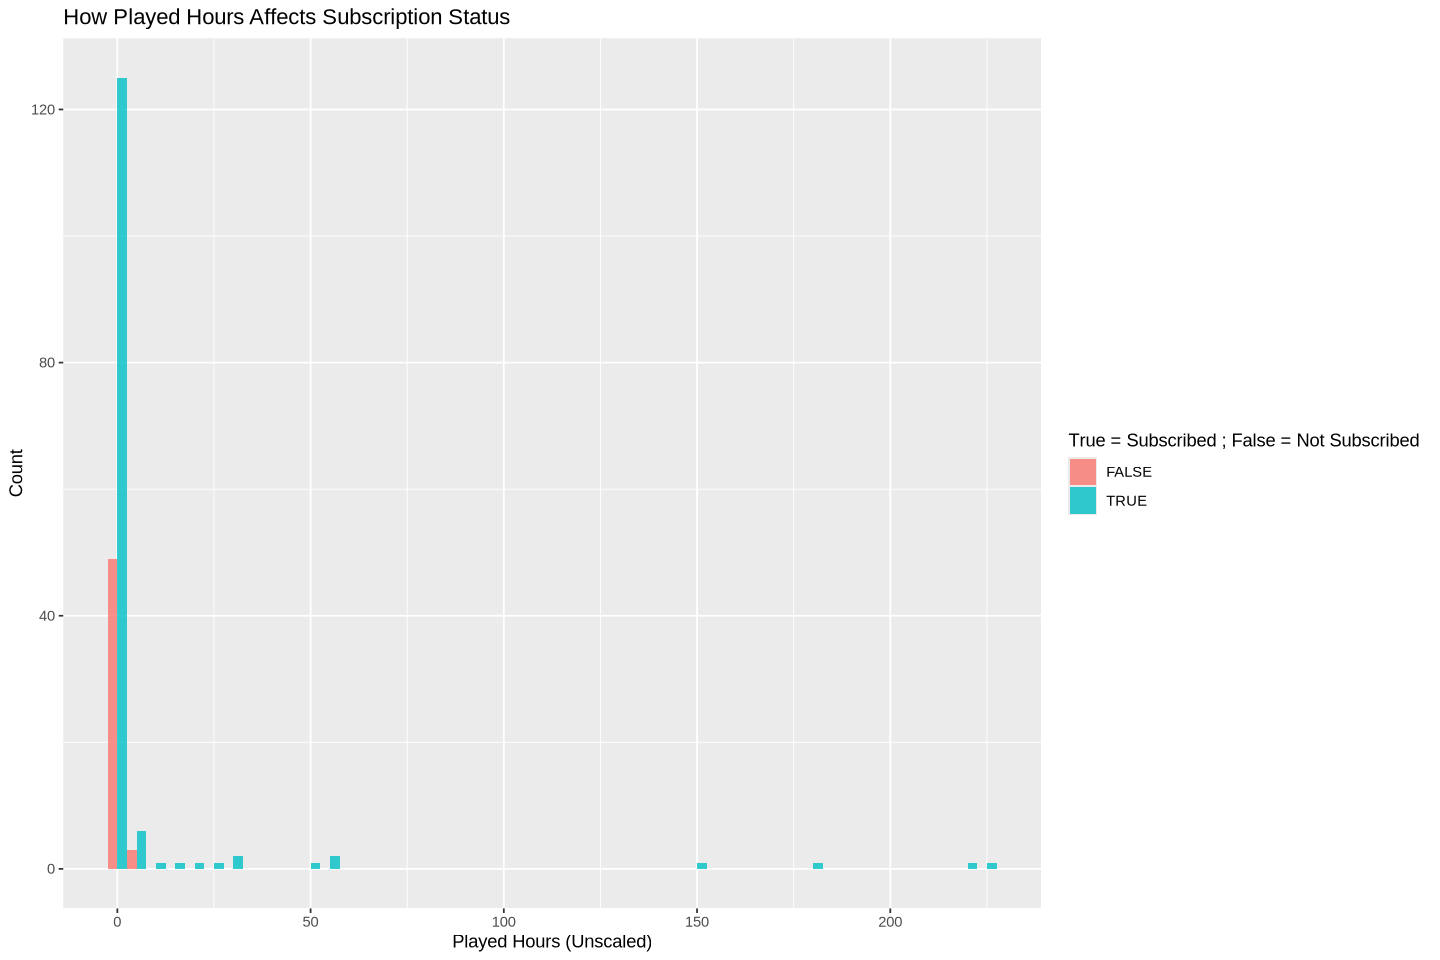

In [39]:
options(repr.plot.width = 12, repr.plot.height = 8)

ggplot(players_data, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(binwidth = 5,  position = "dodge", alpha = 0.8) +
  labs(title = "How Played Hours Affects Subscription Status", x = "Played Hours (Unscaled)", y = "Count", fill = "True = Subscribed ; False = Not Subscribed") 
  

**3) Exploring How Age and Played Hours Affect Subscription Status**

Based on the plot below, younger players (most concentrated at 10-30 years old) are more likely to have played more hours and are more likely to be subscribed, while older players tend to have played fewer hours and are less likely to be subscribed. Both unscaled and scaled data plots are shown below.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


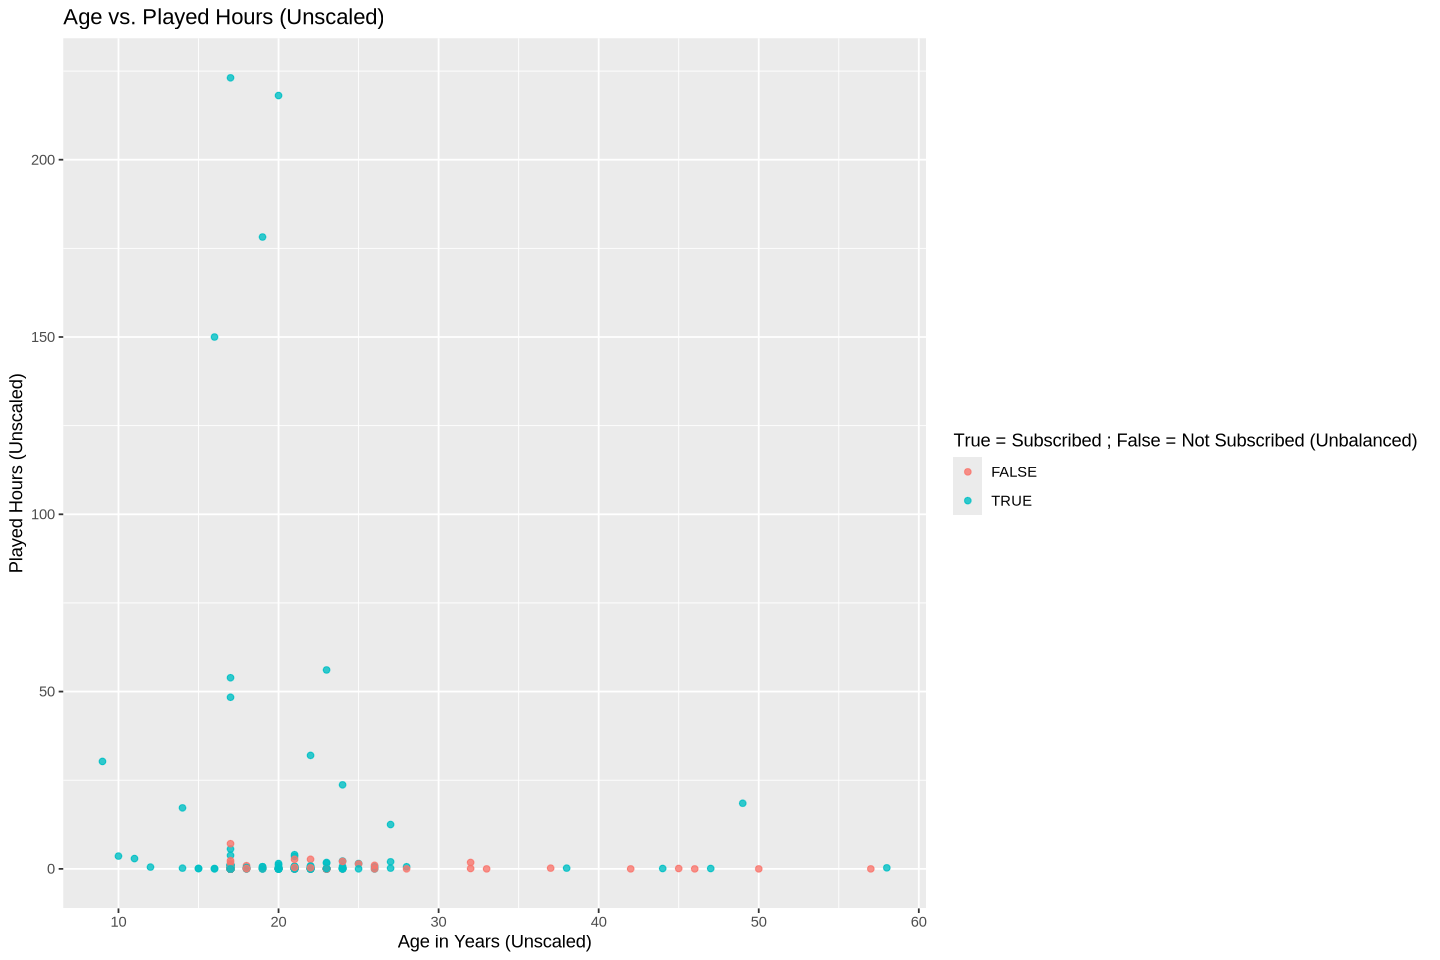

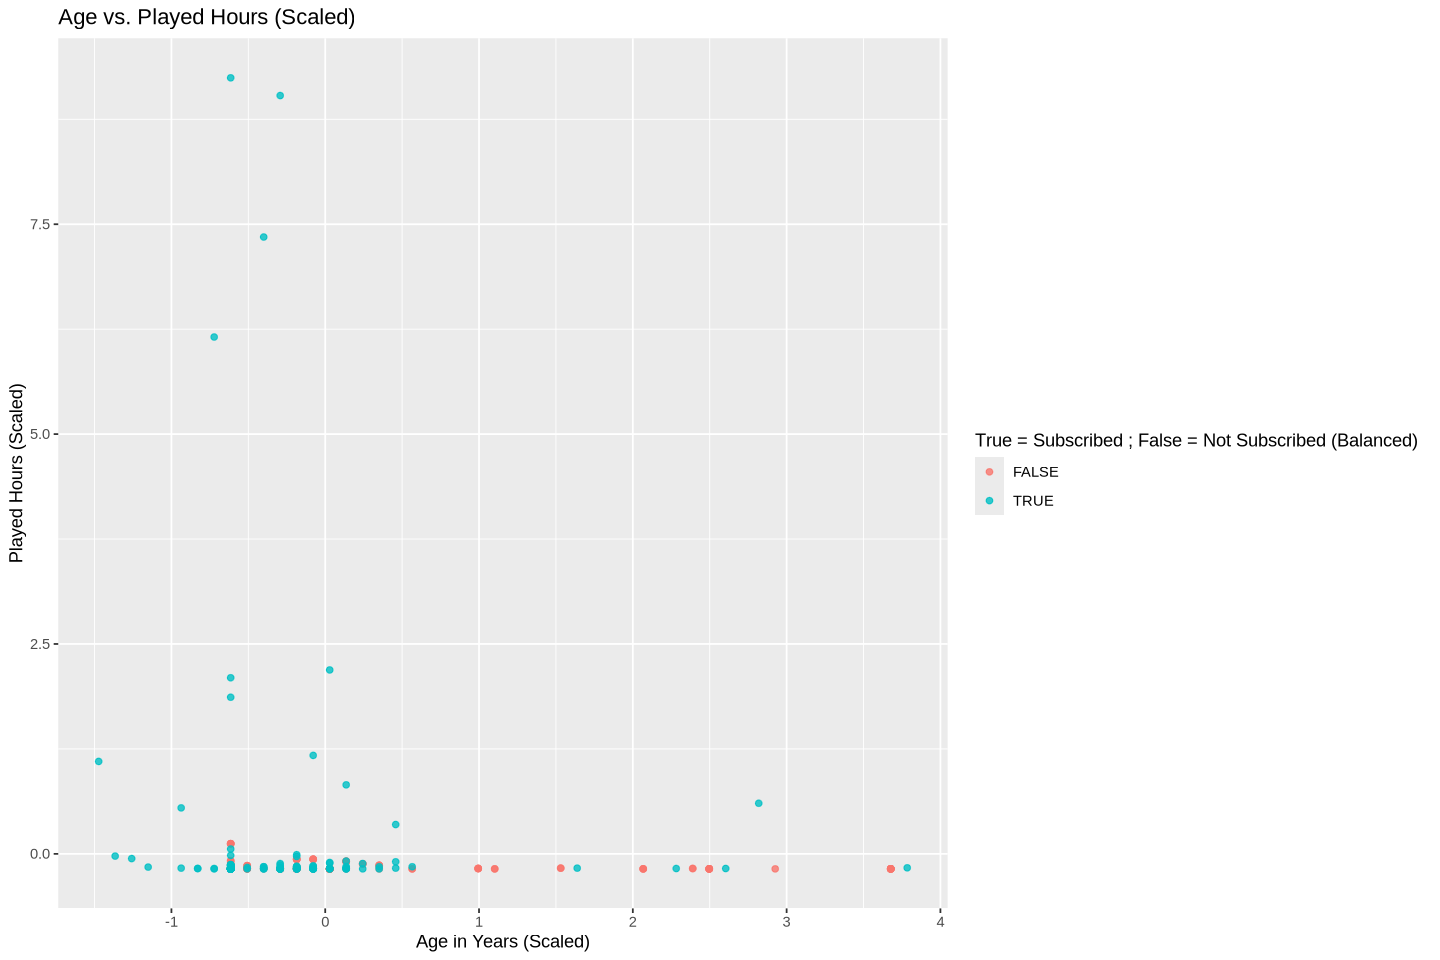

In [40]:
options(repr.plot.width = 12, repr.plot.height = 8)


Nage_vs_playedhours <- players_data |>
ggplot( aes(x= Age, y= played_hours, color = subscribe) ) +
geom_point(alpha = 0.8)+
labs(x= "Age in Years (Unscaled)", y= "Played Hours (Unscaled)", color = "True = Subscribed ; False = Not Subscribed (Unbalanced)" ) +
ggtitle("Age vs. Played Hours (Unscaled)")

Nage_vs_playedhours

age_vs_playedhours <- players_wrangled |>
ggplot( aes(x= Age, y= played_hours, color = subscribe) ) +
geom_point(alpha = 0.8)+
labs(x= "Age in Years (Scaled)", y= "Played Hours (Scaled)", color = "True = Subscribed ; False = Not Subscribed (Balanced)" ) +
ggtitle("Age vs. Played Hours (Scaled)")

age_vs_playedhours


<h1> <u>(4) Methods and Plan </u> </h1>

To address the question, we can perform a K-NN classification with the players data set. This is appropriate because the outcome variable (subscribe) is categorical and would not work for regression models, which have numerical outcomes. A few assumptions are required, such as that the predictors are on the same scale, balanced, and have correct information about the players. A limitation, however, is that it can become slow for large data sets, too many predictors can disable its ability to perform well, and imbalanced class proportions can also be a problem. To perform good K-NN classifications, we need to select an optimal K value:

* Split players_data into training and test sets (70% and 30%)
* Perform cross-validation on the training set only (splits training set into substrain and validation set)
* Create a recipe for the training set, making sure to standardize the predictors
* Create a model that specifies we want to tune our number of neighbors
* Choose a range of K, and perform cross-validation for each K value with our recipe and model
* Evaluate the accuracy for each K and pick the one with the highest

After finding out the optimal K value, we can use this to perform our K-NN classifications and predict the subscription status for new data of Age and played hours.




<h1><u>(5) GitHub Repository</u></h1>

GitHub Repository Link: https://github.com/charlizechan/dsci100_project.git